## **XGBoost**

Using XGBoost for the Iris dataset. This data set includes the width and length of the petals and sepals, and the specific Iris species that these features belong to.

The aim of the following code is to predict the species of a sample based on the size of its petals.

The first step is to load the data set using SciKit, and then let's get to know the data

150
4
['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


([], <a list of 0 Text major ticklabel objects>)

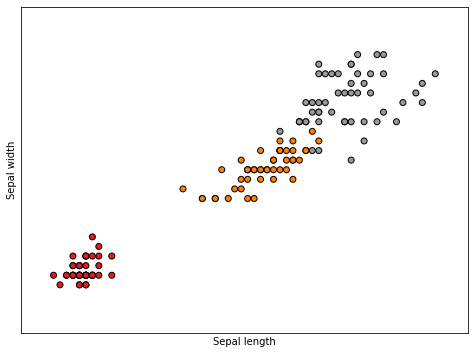

In [13]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()

samplesCount, featuresCount = iris.data.shape
print(samplesCount)
print(featuresCount)
print(list(iris.target_names))
print(iris.feature_names)

X = iris.data[:, 2:]  # we only take the petal length and width
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

The next step is to divide the data into training and testing data. The ratio used will be 80/20.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:], iris.target, test_size=0.2, random_state=0)

We will load XGBoost and convert data into the DMatrix format in order to work with it.

In [15]:
import xgboost as xgb

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

Defining hyperparameters 

In [16]:
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 3} 
epochs = 10 

Training the model

In [17]:
model = xgb.train(param, train, epochs)

Making the predictions

In [18]:
predictions = model.predict(test)


In [19]:
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


Measuring accuracy

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0